In [113]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
b = 7
h = 0.01
y0 = 1
h_min, h_max = 0.001, 0.2

def sol(x):
    return x**10


def f(x, y):
    return 10 * y**(9/10)


x_exact = np.linspace(a, b, 100)
y_exact = sol(x_exact)

print(f"Розв'язок на відрізку [{a}, {b}]: y = x**10")


Розв'язок на відрізку [1, 7]: y = x**10


In [114]:
def adams_bashforth_corrected_fixed_step(a=1.0, b=7.0, y0=1.0, h=0.01, eps=1e-6):
    x_vals = [a]
    y_vals = [y0]
    exact_vals = [sol(a)]
    error_vals = [abs(sol(a) - y0)]
    pred_corr_error = [0.0]

    x1 = a + h
    k1 = f(a, y0)
    k2 = f(a + h/2.0, y0 + h*k1/2.0)
    k3 = f(a + h/2.0, y0 + h*k2/2.0)
    k4 = f(a + h, y0 + h*k3)
    y1 = y0 + h * (k1 + 2*k2 + 2*k3 + k4) / 6.0\


    x_vals.append(x1)
    y_vals.append(y1)
    exact_vals.append(sol(x1))
    error_vals.append(abs(sol(x1) - y1))
    pred_corr_error.append(0.0)
    x0, y0 = x_vals[0], y_vals[0]
    x1, y1 = x_vals[1], y_vals[1]
    y1f, y1c = y_vals[1], y_vals[1]

    while x1 + h <= b:
        x2 = x1 + h

        y2f = y1 + (h/2.0) * (3.0*f(x1, y1) - f(x0, y0))
        y2m = y2f + 5.0/6.0 * (y1c - y1f)
        yi1 = y2m

        for _ in range(100):
            yi0 = yi1
            yi1 = y1 + (h/2.0) * (f(x2, yi0) + f(x1, y1))
            if abs(yi1 - yi0) < eps:
                break

        y2c = yi1
        y2 = y2c - h/6.0 * (y2c - y2f)

        x_vals.append(x2)
        y_vals.append(y2)
        exact_vals.append(sol(x2))
        error_vals.append(abs(sol(x2) - y2))
        pred_corr_error.append(abs(y2c - y2f))

        x0, y0 = x1, y1
        x1, y1 = x2, y2
        y1f, y1c = y2f, y2c

    return np.array(x_vals), np.array(y_vals), np.array(exact_vals), np.array(error_vals), np.array(pred_corr_error)

Перші 3 і останні 3 значення x_vals: [1.   1.01 1.02 6.98 6.99 7.  ]
Перші 3 і останні 3 значення y_approx: [1.00000000e+00 1.10462206e+00 1.21906334e+00 2.74705509e+08
 2.78666349e+08 2.82678513e+08]
Перші 3 і останні 3 значення y_exact: [1.00000000e+00 1.10462213e+00 1.21899442e+00 2.74507507e+08
 2.78465731e+08 2.82475249e+08]


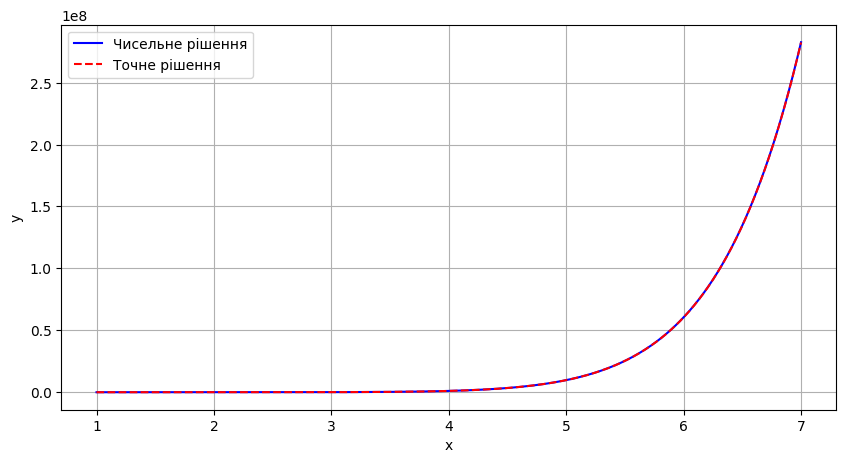

In [115]:
x_vals, y_approx, y_exact, error_vals, pred_corr_error = adams_bashforth_corrected_fixed_step()
print("Перші 3 і останні 3 значення x_vals:", np.concatenate([x_vals[:3], x_vals[-3:]]))
print("Перші 3 і останні 3 значення y_approx:", np.concatenate([y_approx[:3], y_approx[-3:]]))
print("Перші 3 і останні 3 значення y_exact:", np.concatenate([y_exact[:3], y_exact[-3:]]))

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_approx, label='Чисельне рішення', color='blue')
plt.plot(x_vals, y_exact, label='Точне рішення', color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

Перші 3 і останні 3 значення error_vals: [0.00000000e+00 6.35367177e-08 6.89197801e-05 1.98001184e+05
 2.00617326e+05 2.03264138e+05]


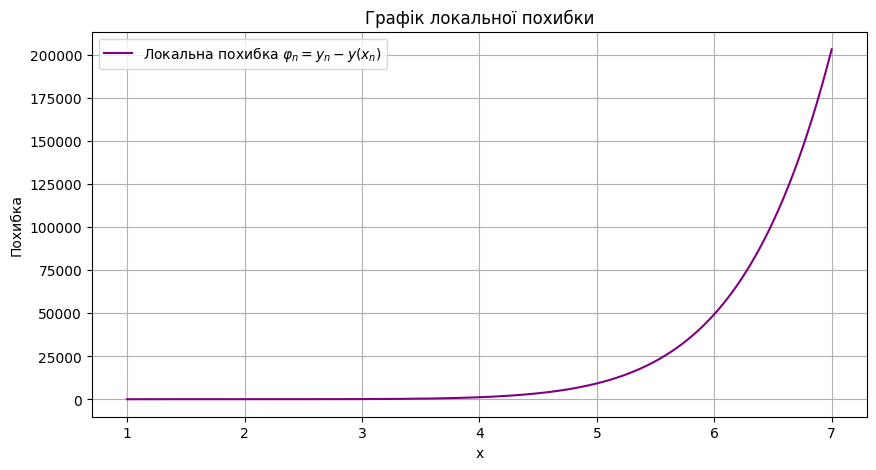

In [116]:
print("Перші 3 і останні 3 значення error_vals:", np.concatenate([error_vals[:3], error_vals[-3:]]))

plt.figure(figsize=(10, 5))
plt.plot(x_vals, error_vals, label='Локальна похибка $\\varphi_n = y_n - y(x_n)$', color='purple')
plt.xlabel('x')
plt.ylabel('Похибка')
plt.title('Графік локальної похибки')
plt.grid(True)
plt.legend()
plt.show()


Перші 3 і останні 3 значення pred_corr_error: [0.00000000e+00 0.00000000e+00 3.89144064e-04 2.87851499e+02
 2.90754673e+02 2.93682908e+02]


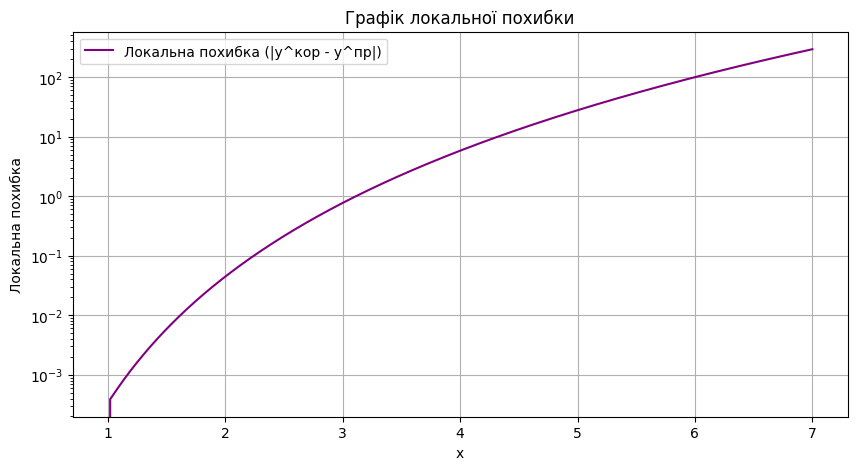

In [117]:
print("Перші 3 і останні 3 значення pred_corr_error:", np.concatenate([pred_corr_error[:3], pred_corr_error[-3:]]))

plt.figure(figsize=(10, 5))
plt.plot(x_vals, pred_corr_error,
         label='Локальна похибка (|y^кор - y^пр|)', color='purple')
plt.xlabel('x')
plt.ylabel('Локальна похибка')
plt.yscale('log')
plt.title('Графік локальної похибки')
plt.grid(True)
plt.legend()    
plt.show()

Перші 3 і останні 3 значення x_adapt: [1.         1.0015625  1.003125   6.99995117 6.99997559 7.        ]
Перші 3 і останні 3 значення y_adapt: [1.00000000e+00 1.01573555e+00 1.03169360e+00 2.82457038e+08
 2.82466890e+08 2.82476741e+08]
Перші 3 і останні 3 значення h_vals: [1.56250000e-03 1.56250000e-03 1.56250000e-03 2.44140625e-05
 2.44140625e-05 2.44140812e-05]


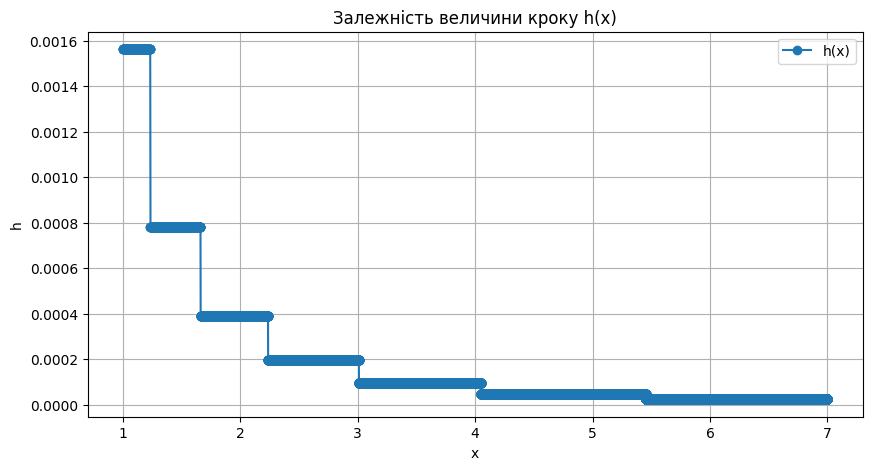

In [118]:
def adams_adaptive_step(a=1.0, b=7.0, y0=1.0, h_init=0.1, eps=1e-6):
    x_vals = [a]
    y_vals = [y0]
    h_vals = []
    x = a
    h = h_init

    while x < b:
        if x + h > b:
            h = b - x

        # Прогноз
        k1 = f(x, y0)
        k2 = f(x + h/2, y0 + h*k1/2)
        k3 = f(x + h/2, y0 + h*k2/2)
        k4 = f(x + h, y0 + h*k3)
        y_rk = y0 + h * (k1 + 2*k2 + 2*k3 + k4) / 6  # Runge-Kutta

        f0 = f(x, y0)
        f1 = f(x + h, y_rk)
        y_corr = y0 + h * (f0 + f1) / 2

        delta = abs(y_corr - y_rk)

        if delta < eps:
            x += h
            y0 = y_corr
            x_vals.append(x)
            y_vals.append(y0)
            h_vals.append(h)
            h *= 2  # Збільшуємо крок
        else:
            h /= 2  # Зменшуємо крок, перерахунок

    return np.array(x_vals), np.array(y_vals), np.array(h_vals)


x_adapt, y_adapt, h_vals = adams_adaptive_step()

# Виведення перших 3 і останніх 3 значень x_adapt, y_adapt, h_vals
print("Перші 3 і останні 3 значення x_adapt:", np.concatenate([x_adapt[:3], x_adapt[-3:]]))
print("Перші 3 і останні 3 значення y_adapt:", np.concatenate([y_adapt[:3], y_adapt[-3:]]))
print("Перші 3 і останні 3 значення h_vals:", np.concatenate([h_vals[:3], h_vals[-3:]]))
# Побудова графіка залежності h(x)
plt.figure(figsize=(10, 5))
plt.plot(x_adapt[:-1], h_vals, label='h(x)', marker='o')
plt.xlabel('x')
plt.ylabel('h')
plt.title('Залежність величини кроку h(x)')
plt.grid(True)
plt.legend()
plt.show()

